In [1]:
using Plots

┌ Info: Precompiling Plots [91a5bcdd-55d7-5caf-9e0b-520d859cae80]
└ @ Base loading.jl:1317


In [2]:
function w1_prim_fun(theta1, theta2, w1, w2, L1 = 1, L2 = 1, m1 = 1, m2 = 1, g = 9.82)
    num1 = -g*(2*m1 + m2)*sin(theta1)
    num2 = -m2*g*sin(theta1 - 2*theta2)
    num3 = -2*sin(theta1-theta2)*m2*(w2*w2*L2 + w1*w1*L1*cos(theta1-theta2))
    denom = L1*(2*m1 + m2 - m2 * cos(2*theta1 - 2*theta2))
    
    (num1 + num2 + num3) / denom
end

w1_prim_fun (generic function with 6 methods)

In [3]:
function w2_prim_fun(theta1, theta2, w1, w2, L1 = 1, L2 = 1, m1 = 1, m2 = 1, g = 9.82)
    num1 = 2*sin(theta1-theta2)
    num2 = w1*w1*L1*(m1+m2)
    num3 = g*(m1+m2)*cos(theta1)
    num4 = w2*w2*L2*m2*cos(theta1-theta2)
    
    
    denom = L1*(2*m1 + m2 - m2 * cos(2*theta1 - 2*theta2))
    
    (num1 *(num2 + num3 + num4)) / denom
end

w2_prim_fun (generic function with 6 methods)

In [4]:
function double_pend_euler(theta1_init, theta2_init, h, steps)
    results = zeros(steps, 3)
    theta1 = theta1_init
    theta2 = theta2_init
    w1 = 0
    w2 = 0
    for i in 1:steps
        theta1 = theta1 + h * w1
        theta2 = theta2 + h * w2
        
        w1 = w1 + h * w1_prim_fun(theta1, theta2, w1, w2)
        w2 = w2 + h * w2_prim_fun(theta1, theta2, w1, w2)
    results[i,:] = [i*h,theta1,theta2]
    end
    results
    
end

double_pend_euler (generic function with 1 method)

In [5]:
data = double_pend_euler(1,1,0.01,1000);

In [6]:
function get_points(data, L1 = 1, L2 = 1)
    res = zeros(size(data)[1],6)
    x0,y0 = 0,0
    for i in 1:size(data)[1]
        x1 = x0 - L1 * sin(data[i,2])
        y1 = y0 - L1 * cos(data[i,2])
        x2 = x1 - L2 * sin(data[i,3])
        y2 = y1 - L2 * cos(data[i,3])
        res[i,:] = [x0 y0 x1 y1 x2 y2]
    end
    res
end

get_points (generic function with 3 methods)

In [7]:
data = double_pend_euler(1.6,1,0.01,1000)
pts = get_points(data);

In [8]:
function draw_circle(h,k,r)
    theta = 0:0.01:2*pi
    h .+ r*sin.(theta), k.+ r*cos.(theta)
end

draw_circle (generic function with 1 method)

In [9]:
function create_animation(theta1, theta2, delta, steps)
    data = double_pend_euler(theta1, theta2, delta, steps)
    pts = get_points(data);
    anim = @animate for i in 1:2:size(pts)[1]
        x0,y0 ,x1, y1, x2, y2 = pts[i,:]
        plot(draw_circle(x0,y0,0.01), 
            seriestype = [:shape,], 
            color = :red, 
            label = "",
            xlabel = string(round.(delta*i; digits=3))
        )
        plot!(draw_circle(x1,y1,0.01), 
            seriestype = [:shape,], 
            color = :red, 
            label = ""
        )
        plot!(draw_circle(x2,y2,0.01), 
            seriestype = [:shape,], 
            color = :red, 
            label = ""
        )
        plot!([(x0,y0),(x1,y1)], 
            xlims = (-2.5,2.5),
            ylims = (-2.5,2.5),
            label = "",
            aspect_ratio = 1)
        plot!([(x1,y1),(x2,y2)], label = "")
    end
    anim
end

create_animation (generic function with 1 method)

In [10]:
anim1 = create_animation(1.6,1,0.01,1000)

Animation("/tmp/jl_SzTvLL", ["000001.png", "000002.png", "000003.png", "000004.png", "000005.png", "000006.png", "000007.png", "000008.png", "000009.png", "000010.png"  …  "000491.png", "000492.png", "000493.png", "000494.png", "000495.png", "000496.png", "000497.png", "000498.png", "000499.png", "000500.png"])

┌ Info: Saved animation to 
│   fn = /home/wojkly/Documents/STUDIA/mownit/anim1.gif
└ @ Plots /home/wojkly/.julia/packages/Plots/iYDwd/src/animation.jl:104


Plots.AnimatedGif("/home/wojkly/Documents/STUDIA/mownit/anim1.gif")
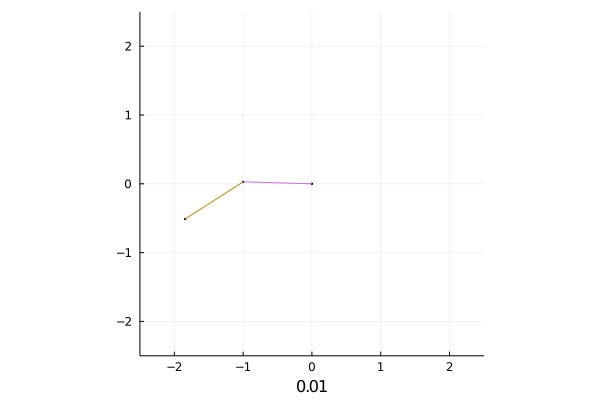

In [11]:
gif(anim1, "anim1.gif",fps = 15)

In [12]:
anim2 = create_animation(2.1,3,0.01,1000)

Animation("/tmp/jl_AI543H", ["000001.png", "000002.png", "000003.png", "000004.png", "000005.png", "000006.png", "000007.png", "000008.png", "000009.png", "000010.png"  …  "000491.png", "000492.png", "000493.png", "000494.png", "000495.png", "000496.png", "000497.png", "000498.png", "000499.png", "000500.png"])

┌ Info: Saved animation to 
│   fn = /home/wojkly/Documents/STUDIA/mownit/anim2.gif
└ @ Plots /home/wojkly/.julia/packages/Plots/iYDwd/src/animation.jl:104


Plots.AnimatedGif("/home/wojkly/Documents/STUDIA/mownit/anim2.gif")
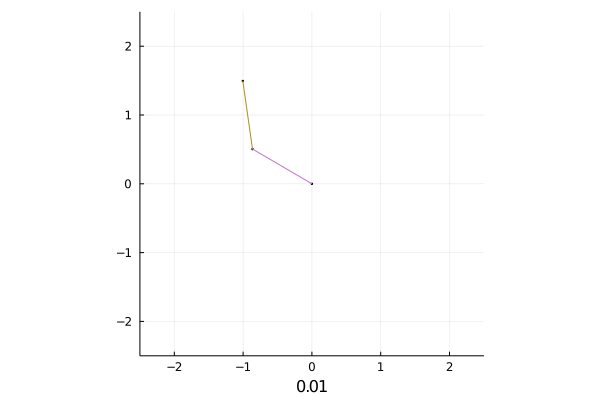

In [13]:
gif(anim2, "anim2.gif",fps = 15)

In [14]:
anim3 = create_animation(pi - 0.01,pi,0.01,1000)

Animation("/tmp/jl_Tf46aL", ["000001.png", "000002.png", "000003.png", "000004.png", "000005.png", "000006.png", "000007.png", "000008.png", "000009.png", "000010.png"  …  "000491.png", "000492.png", "000493.png", "000494.png", "000495.png", "000496.png", "000497.png", "000498.png", "000499.png", "000500.png"])

┌ Info: Saved animation to 
│   fn = /home/wojkly/Documents/STUDIA/mownit/anim3.gif
└ @ Plots /home/wojkly/.julia/packages/Plots/iYDwd/src/animation.jl:104


Plots.AnimatedGif("/home/wojkly/Documents/STUDIA/mownit/anim3.gif")
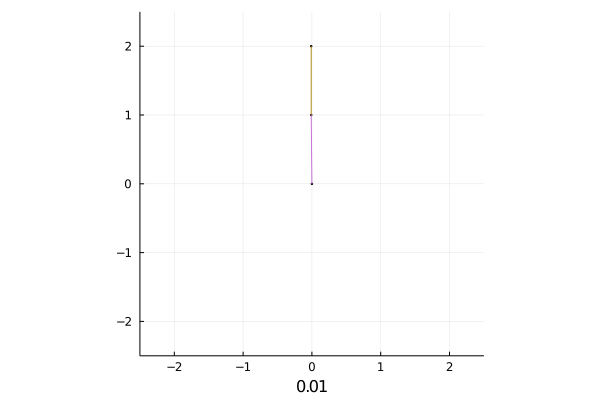

In [15]:
gif(anim3, "anim3.gif",fps = 15)

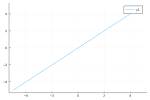

In [16]:
plot(x -> x)